# Solução do problema do Caixeiro Viajante (TSP)

### Uso de duas técnicas diferentes
1. Busca exaustiva
2. Algoritmos Genéticos

In [1]:
# Stephen Marsland, 2008, 2014
# Adaptação e correção de bugs por Hendrik Macedo

import numpy as np
import time

def makeTSP(nCities):
	positions = 2*np.random.rand(nCities,2)-1;
	distances = np.zeros((nCities,nCities))

	for i in range(nCities):
		for j in range(i+1,nCities):
			distances[i,j] = np.sqrt((positions[i,0] - positions[j,0])**2 + (positions[i,1] - positions[j,1])**2);
			distances[j,i] = distances[i,j];
	# distances[0,0] = 0
	# distances[0,1] = 1
	# distances[0,2] = 2
	# distances[0,3] = 3
	# distances[0,4] = 4
	# distances[1,1] = 0
	# distances[1,2] = 5
	# distances[1,3] = 6
	# distances[1,4] = 7
	# distances[2,2] = 0
	# distances[2,3] = 8
	# distances[2,4] = 9
	# distances[3,3] = 0
	# distances[3,4] = 1
	# distances[4,4] = 0
	# for i in range(nCities):
	# 	for j in range(i+1,nCities):
	# 		distances[j,i] = distances[i,j];

	return distances

def permutation(order):
	order = tuple(order)
	if len(order)==1:
		yield order
	else:
		for i in range(len(order)):
			rest = order[:i] + order[i+1:]
			move = (order[i],)
			for smaller in permutation(rest):
				yield move + smaller

def parameters(nCities):
	distances = makeTSP(nCities)
	return distances

In [2]:
def exhaustive(distances):
	nCities = np.shape(distances)[0]

	cityOrder = np.arange(nCities)

	distanceTravelled = 0
	for i in range(nCities-1):
		distanceTravelled += distances[cityOrder[i],cityOrder[i+1]]
	distanceTravelled += distances[cityOrder[nCities-1],cityOrder[0]]

	for newOrder in permutation(range(nCities)):
		possibleDistanceTravelled = 0
		for i in range(nCities-1):
			possibleDistanceTravelled += distances[newOrder[i],newOrder[i+1]]
		possibleDistanceTravelled += distances[newOrder[nCities-1],newOrder[0]]
				
		if possibleDistanceTravelled < distanceTravelled:
			distanceTravelled = possibleDistanceTravelled
			cityOrder = newOrder

	return cityOrder, distanceTravelled

In [3]:
def runExaustive(distances):
	print ("Busca exaustiva")
	start = time.time()
	result = exhaustive(distances)
	finish = time.time()
	print ("Ordem:",result[0]," Distancia:",result[1])
	print ("Tempo:",finish-start)

In [4]:
n = 9
distances = parameters(n)
print(distances)

[[0.         1.3173315  1.49371792 1.37047823 2.16948748 1.91366588
  1.02121056 0.40985158 1.26560155]
 [1.3173315  0.         1.60286678 0.2013632  1.53232233 1.55948492
  1.49661945 1.06658924 1.81238389]
 [1.49371792 1.60286678 0.         1.7951737  1.03025834 0.61410633
  0.51281743 1.70233034 0.5270264 ]
 [1.37047823 0.2013632  1.7951737  0.         1.7229194  1.76040171
  1.66199826 1.06943693 1.98143977]
 [2.16948748 1.53232233 1.03025834 1.7229194  0.         0.42966696
  1.44392193 2.20145641 1.55402783]
 [1.91366588 1.55948492 0.61410633 1.76040171 0.42966696 0.
  1.07143272 2.01750162 1.14113205]
 [1.02121056 1.49661945 0.51281743 1.66199826 1.44392193 1.07143272
  0.         1.2924218  0.32278576]
 [0.40985158 1.06658924 1.70233034 1.06943693 2.20145641 2.01750162
  1.2924218  0.         1.57782937]
 [1.26560155 1.81238389 0.5270264  1.98143977 1.55402783 1.14113205
  0.32278576 1.57782937 0.        ]]


In [5]:
runExaustive(distances)

Busca exaustiva
Ordem: (7, 0, 6, 8, 2, 5, 4, 1, 3)  Distancia: 6.127770051357038
Tempo: 3.7867929935455322


### Algoritmos Genéticos

In [6]:
def fit(pop, distances):
	nCities = np.shape(distances)[0]
	fitness = np.zeros(np.shape(pop)[0])
	
	for j in range (np.shape(pop)[0]):
		for i in range(nCities-1):            
			fitness[j] += distances[pop[j][i],pop[j][i+1]]
		fitness[j] += distances[pop[j][nCities-1],pop[j][0]]
	return fitness

In [7]:
import numpy as np
import random
import time
class ga:

	def __init__(self,stringLength,distances,nEpochs=300,populationSize=500,mutationProb=0.05):
		""" Constructor"""
		self.stringLength = stringLength
		
		# Population size should be even
		if np.mod(populationSize,2)==0:
			self.populationSize = populationSize
		else:
			self.populationSize = populationSize+1
		
		if mutationProb < 0:
			 self.mutationProb = 1/stringLength
		else:
			 self.mutationProb = mutationProb
			 	  
		self.nEpochs = nEpochs

		self.fitnessFunction = 'fit'
        
		#Na Codificação por Permutação, cada cromossoma é uma série de números que representa uma posição em uma seqüência
		#Codificação: Os cromossomas descrevem a ordem em que o caixeiro visitará as cidades.
		data = range(0, self.stringLength)
		self.population = np.zeros((self.populationSize,self.stringLength), dtype=np.int)
		for i in range(self.populationSize):
            
			self.population[i] = random.sample(data, self.stringLength)
		self.distances = distances
        
	def runGA(self):
		"""The basic loop"""
		best_value = np.zeros(self.nEpochs)
		best_order = np.zeros((self.nEpochs,self.stringLength), dtype=np.int)

		for i in range(self.nEpochs):
			# Compute fitness of the population
			fitness = eval(self.fitnessFunction)(self.population, self.distances)

			# Pick parents -- can do in order since they are randomised
			newPopulation = self.fps(self.population,fitness)
            
			# Apply the genetic operators
			newPopulation = self.spCrossover(newPopulation)
			newPopulation = self.mutate(newPopulation)


			best_value[i] = min(fitness)
			best_order[i] = self.population[np.argmin(fitness)]
			#print (i, " Ordem: ", best_order[i]," Distancia:",best_value[i])
			self.population = newPopulation

		b_v = min(best_value)
		b_o = best_order[np.argmin(best_value)]
		#return best_order[self.nEpochs-1], best_value[self.nEpochs-1], best_value
		return b_o, b_v, best_value    
		#pl.show()

        
	def fps(self,population,fitness):
		#Probabilidade de uma string ser selecionada é proporcional à sua aptidão dentro da população
		# Scale fitness by total fitness
		fitness = 1/fitness
		fitness = fitness/np.sum(fitness)
		fitness = 10*fitness/fitness.max()
		
		# Put repeated copies of each string in according to fitness
		# Deal with strings with very low fitness
		j=0
		while np.round(fitness[j])<1:
			j = j+1
		
		newPopulation = np.kron(np.ones((int(np.round(fitness[j])),1), dtype=np.int),population[j,:])

		# Add multiple copies of strings into the newPopulation
		for i in range(j+1,self.populationSize):
			if np.round(fitness[i])>=1:
				newPopulation = np.concatenate((newPopulation,np.kron(np.ones((int(np.round(fitness[i])),1), dtype=np.int),population[i,:])),axis=0)

		# Shuffle the order (note that there are still too many)
		indices = list(range(np.shape(newPopulation)[0]))
		np.random.shuffle(indices)
		newPopulation = newPopulation[indices[:self.populationSize],:]
		return newPopulation	
    
	def spCrossover(self,population):
		# Single point crossover
		#order crossover operator (OX1): A portion of one parent is mapped to a portion of the other parent. 
		#From the replaced portion on, the rest is filled up by the remaining genes, where already present 
		#genes are omitted and the order is preserved.
        
		# Cruzamento com permutação em Ponto único - parte do primeiro pai (isto é, parte da seqüencia das cidades) é copiada 
		# e o resto das cidades é copiada na mesma seqüência do segundo pai
		newPopulation = np.zeros(np.shape(population), dtype=np.int)
		crossoverPoint = np.random.randint(0,self.stringLength,self.populationSize)
		for i in range(0,self.populationSize,2):
            
			newPopulation[i,:crossoverPoint[i]] = population[i,:crossoverPoint[i]]
			newPopulation[i+1,:crossoverPoint[i]] = population[i+1,:crossoverPoint[i]]

			p1 = crossoverPoint[i]
			p2 = crossoverPoint[i]
			for j in range(self.stringLength):
				if population[i+1,j] not in newPopulation[i,:crossoverPoint[i]]:
					newPopulation[i,p1]=population[i+1,j]
					p1 += 1
				if population[i,j] not in newPopulation[i+1,:crossoverPoint[i]]:
					newPopulation[i+1,p2]=population[i,j]
					p2 += 1


		return newPopulation
    
	def mutate(self,population):
		# Mutation
		whereMutate = np.random.sample(np.shape(population)[0])
		population[np.where(whereMutate < self.mutationProb)] = self.mutateIndividual(population[np.where(whereMutate < self.mutationProb)])
		return population

	def mutateIndividual(self,population):
		# Mutation
		for i in range(np.shape(population)[0]):
			i0 = np.random.randint(self.stringLength)
			i1 = np.random.randint(self.stringLength)
			v = population[i][i0]
			population[i][i0] = population[i][i1]
			population[i][i1] = v
		return population

In [8]:
import pylab as pl
def runGA(n,distances):
	import time

	print ("\nAlgoritmo Genético")
	pl.ion()
	pl.show()

	plotfig = pl.figure()
    
	start = time.time()
	iga = ga(n,distances, nEpochs=20*n,populationSize=20*n,mutationProb=0.01)
	result = iga.runGA()
	finish = time.time()    
	print ("Ordem:",result[0]," Distancia:",result[1])    
	print ("Tempo: ",finish-start)
	pl.ion()    
	pl.plot(result[2],'kx-')


Algoritmo Genético


<ipython-input-7-fc12e487f6bf>:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.population = np.zeros((self.populationSize,self.stringLength), dtype=np.int)
<ipython-input-7-fc12e487f6bf>:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

Ordem: [7 3 1 4 5 2 8 6 0]  Distancia: 6.1277700513570394
Tempo:  9.06929326057434


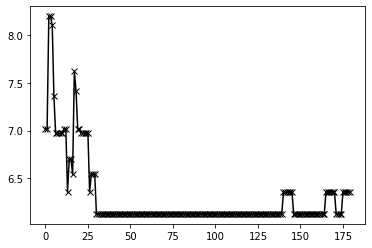

In [9]:
runGA(n,distances)